# Combinatorics with SageMath: Graphs

## Nadia Lafrenière
### Dartmouth College (🇺🇸) $\xrightarrow{🚌}$ Concordia University (🇨🇦) 

## EAUMP-ICTP School on Enumerative Combinatorics
### Arusha, Tanzania, July 27, 2023

# Graphs
A **graph** is given by a set of *vertices* and a set of *edges* connecting the vertices. Just that!

Graphs are very useful to represent connections between people, networks, etc. A lot of theory exists on them!

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [6, 3]

# Motivation

> Can you draw these pictures without ever crossing your path?

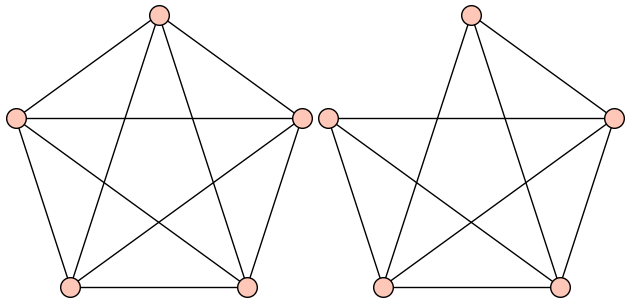

In [1]:
A = graphs.CompleteGraph(5)
B = A.copy(); B.delete_edge([0,1])
graphics_array([A.plot(vertex_labels=False), B.plot(vertex_labels=False)])

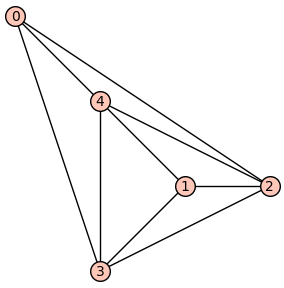

In [4]:
B.plot(layout='planar')

When we ask this question in graph theory, we mean 'Can we draw a picture *equivalent to this one*, in the sense that the same vertices are connected?'

> Can you draw this graph without ever lifting your pen? 

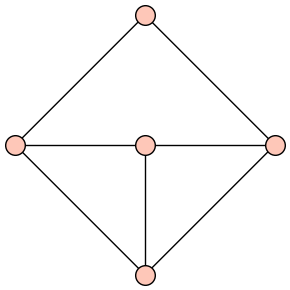

In [3]:
A = graphs.WheelGraph(5)
A.delete_edge([0,1])
A.plot(vertex_labels=False)

These problems look like children problems because the graphs are small, but we could ask the same question for much much larger graphs.

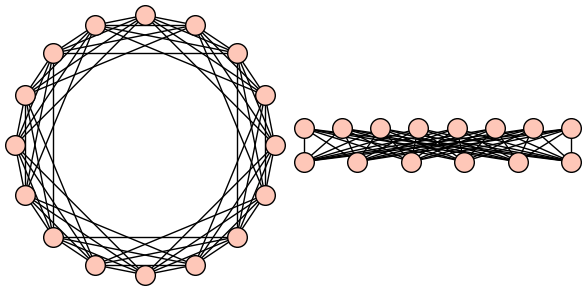

In [4]:
graphics_array([graphs.HararyGraph(8,16).plot(vertex_labels=False),graphs.CompleteBipartiteGraph(8,6).plot(vertex_labels=False)])

# Motivation
> How many colours do you need to draw a map of Africa so that no two adjacent countries have the same colour ?

We already know that we needed at least 4 colours, since Uganda, Rwanda, Tanzania and the DRC are all adjacent.
The *four color theorem* tells us that any map can be colored with only 4 colors so that no two countries are adjacent.
SageMath can confirm that.

In [5]:
# This number is called the chromatic number of a graph
G = graphs.AfricaMap()  # already in SageMath
G.chromatic_number()

4

More interestingly, SageMath can tell us how to use for what country.

In [6]:
c = G.coloring()

In [7]:
for i in range(4):
    s = ''
    for country in c[i]:
        s += str(country)
        s += ", "
    print(s)

Benin, Ghana, Mali, Liberia, Guinea-Bissau, Libya, Cameroon, South Sudan, Tanzania, Angola, Zimbabwe, Swaziland, Eritrea, Somalia, Lesotho, Morocco, Gambia, Cape Verde, Seychelles, Mauritius, São Tomé and Príncipe, Madagascar, Comoros, 
Togo, Ivory Coast, Senegal, Sierra Leone, Algeria, Chad, Ethiopia, Democratic Republic of the Congo, Gabon, Namibia, Malawi, Egypt, 
Burkina Faso, Guinea, Mauritania, Tunisia, Nigeria, Sudan, Republic of the Congo, Kenya, Rwanda, Zambia, Equatorial Guinea, South Africa, Djibouti, 
Niger, Central Africa, Uganda, Burundi, Mozambique, Botswana, 


Then we can export that list to some online tools that can plot for us the map.

<img src="images/Africa_4colors.png" width="500">

# Constructing graphs in SageMath

Recall that a graph is **a set of vertices and a set of edges** between these vertices.

This is the data that SageMath takes to construct graphs, even though they can be constructed in many ways.

> Find how to construct a graph in SageMath.

In [8]:
Graph?

The documentation says that a graph is created with some *data*, that can be any of the following.
   1. "Graph()" -- build a graph on 0 vertices.
   2. "Graph(5)" -- return an edgeless graph on the 5 vertices
      0,...,4.
   3. "Graph([list_of_vertices, list_of_edges])" -- returns a graph
      with given vertices/edges.
   4. "Graph(list_of_edges)" -- return a graph with a given list of
      edges (see documentation of "add_edges()").
   5. "Graph({1: [2, 3, 4], 3: [4]})" -- return a graph by
      associating to each vertex the list of its neighbors.
   6. "Graph({1: {2: 'a', 3:'b'} ,3:{2:'c'}})" -- return a graph by
      associating a list of neighbors to each vertex and providing
      its edge label.
   7. "Graph(a_symmetric_matrix)" -- return a graph with given
      (weighted) adjacency matrix (see documentation of
      "adjacency_matrix()").
   8. "Graph(a_nonsymmetric_matrix)" -- return a graph with given
      incidence matrix (see documentation of "incidence_matrix()").
[...]

SageMath also knows **a lot** of common graphs. These are accessed by typing `graphs.[tab]`

In [9]:
# In class
graphs.

What is your favorite graph?

# Create the following graph, in class
<img src="images/bowtie.png" width="200">

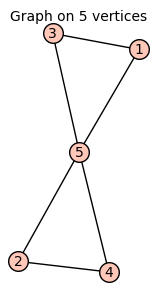

In [10]:
# In class
V = [1,2,3,4,5]
E = [[1,3], [1,5], [2,5], [2,4], [3,5], [4,5]]
Graph(E)

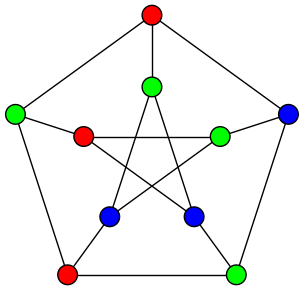

In [11]:
# A graph I like
G = graphs.PetersenGraph(); c = G.coloring(hex_colors=True); G.plot(vertex_colors=c, vertex_labels=False)

# Some homework problems that my students could use SageMath for.
> Prove or disprove: All hypercubes are bipartite.

> What is the number of non-loop edges in the De Bruijn digraph Dn (for n ≥ 2)? Prove your answer

> Are the following graphs planar? Prove your answer. (a) The complete bipartite graph $K_{4,2}$ (b) The hypercube $H_3$ (c) The Petersen graph

> Prove or disprove: All hypercubes are bipartite.

Won't give a proof, but might either give a counterexample, or convince one to prove it.

In [12]:
for n in range(1, 10):
    print(n, graphs.CubeGraph(n).is_bipartite())

1 True
2 True
3 True
4 True
5 True
6 True
7 True
8 True
9 True


**Theorem**: All hypergraphs are bipartite.

(The proof can be done easily, by writing the coordinates as tuples over 0 and 1 and taking their sum. All the neighbors of an odd-sum vertex have an even sum.)

> What is the number of non-loop edges in the De Bruijn digraph Dn (for n ≥ 2)? Prove your answer

Again, won't give a proof, but we could count it for all small values of $n$,

In [13]:
for n in range(1, 10):
    G = digraphs.DeBruijn(2, n)
    print(n, len(G.edges()) - len(G.loop_edges()))

1 2
2 6
3 14
4 30
5 62
6 126
7 254
8 510
9 1022


/tmp/ipykernel_54294/2879207802.py:3: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See https://github.com/sagemath/sage/issues/27408 for details.
  print(n, len(G.edges()) - len(G.loop_edges()))


**Conjecture**: the number of non-loop edges in a DeBruijn graph for $n$ is $2^{n+1}-2$.

It is not hard to prove, but we would need to know what a DeBruijn graph is, and to understand it.

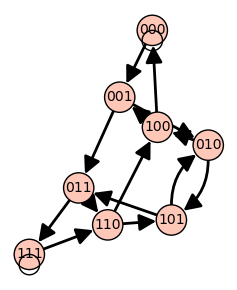

In [14]:
digraphs.DeBruijn(2,3).plot(vertex_size=800)

A *De Bruijn* graph has for vertices all the binary sequence of a given length, and there is an arrow connecting two sequences if taking the tail removing the first letter and replacing the last letter by anything, we can get the tip of the arrow.

It has $2^n$ vertices, $2^{n+1}$ edges, and only two of them are loops (`000...0 -> 000...0`and `111...1 -> 111...1`).

> Are the following graphs planar? Prove your answer. (a) The complete bipartite graph $K_{4,2}$ (b) The hypercube $H_3$ (c) The Petersen graph

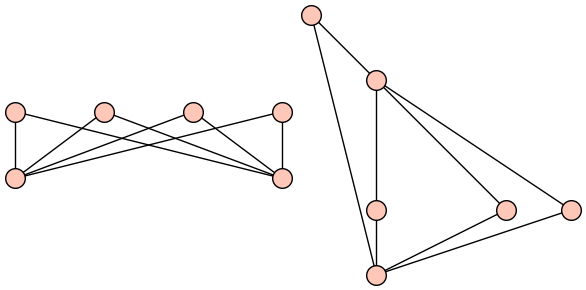

In [15]:
G = graphs.CompleteBipartiteGraph(4,2)
graphics_array([G.plot(vertex_labels=False), G.plot(layout='planar', vertex_labels=False)])

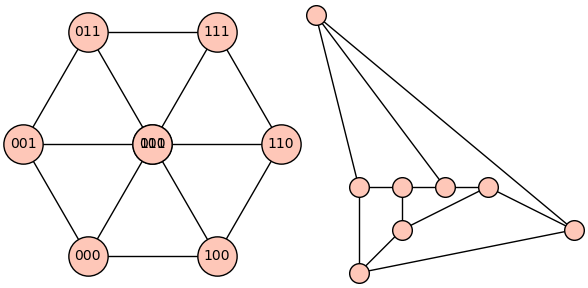

In [16]:
G = graphs.CubeGraph(3)
graphics_array([G.plot(vertex_labels=True, vertex_size=800), G.plot(layout='planar', vertex_labels=False)])

In [17]:
G = graphs.PetersenGraph()
G.is_planar()

False

The cube and the complete bipartite graph $K_{4,2}$ are planar, the Petersen graph is not.

# Takeaways
- SageMath would be a good help for my student's homeworks (at least for some problems)
- SageMath does not always give the most natural or clever visual representation. But, it has a lot of parameters to customize the presentation.
- Also, other tools in Python, for example, are much better for visualization. 

# A few classical problems  in graph theory
Given a graph, what is...
- ... the distance between two given vertices?
- ... the minimum number of edges that one needs to remove to disconnect the graph (this is the *edge-connectivity*)?
- ... the largest set of vertices that have no edge in between (the largest independent set)?
- ... the minimum number of colours needed to colour the vertices, so that two adjacent vertices have different colours; this is the *chromatic number*?
- ... a shortest path between two given vertices?
- ... the size of the largest clique: a *clique* is a complete subgraph?

SageMath knows all of them!

> In class. Generate a random graph with 15 vertices, in which each edge appears with probability 0.3
Then solve all the problems above.

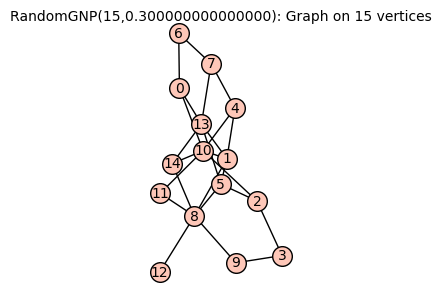

In [16]:
# In-class work
G = graphs.RandomGNP(15, 0.3); G

In [19]:
G.distance(4,8)

2

In [22]:
G.edge_connectivity(value_only=False)

[1, [(12, 8)]]

In [24]:
G.independent_set()

[0, 1, 2, 7, 9, 11, 12, 14]

In [25]:
G.shortest_path(4,8)

[4, 1, 8]

In [28]:
G.clique_maximum()

[1, 4, 10]

In [19]:
## Solutions are below

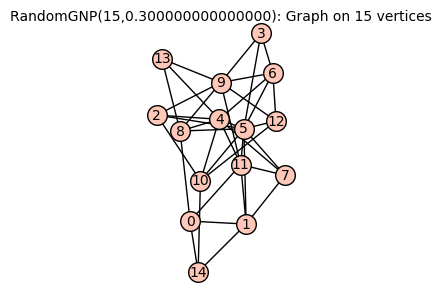

In [20]:
G = graphs.RandomGNP(15, 0.3); G

In [21]:
G.distance(2, 14)

2

In [22]:
G.edge_connectivity()

3

In [23]:
len(G.independent_set())

6

In [24]:
G.chromatic_number()

4

In [25]:
G.shortest_path(2, 14)

[2, 10, 14]

In [26]:
G.clique_number()

4

## Display
For each of the problems above, we can illustrate this directly on the graph. We will explore the drawing options together, and solve each of the problems above.

Given a graph, what is...
- ... the distance between two given vertices?
- ... the minimum number of edges that one needs to remove to disconnect the graph (this is the *edge-connectivity*)?
- ... the largest set of vertices that have no edge in between (the largest independent set)?
- ... the minimum number of colours needed to colour the vertices, so that two adjacent vertices have different colours; this is the *chromatic number*?
- ... a shortest path between two given vertices?
- ... the size of the largest clique: a *clique* is a complete subgraph?

In [27]:
# In class

In [32]:
edges_in_path = []
p = G.shortest_path(6,9)
for i in range(len(p[:-1])):
    edges_in_path.append([p[i], p[i+1]])
edges_in_path

[[6, 0], [0, 10], [10, 1], [1, 8], [8, 9]]

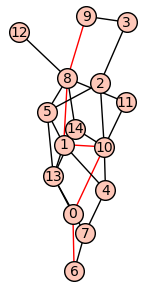

In [33]:
G.plot(edge_colors=dict([('red', edges_in_path)]))

In [34]:
G.edge_connectivity(value_only=False)

[1, [(12, 8)]]

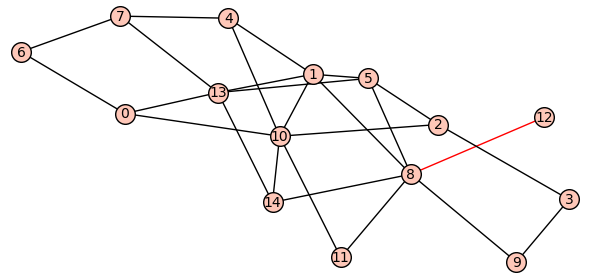

In [35]:
G.plot(edge_colors=dict([('red', _[1])]))

In [36]:
G.independent_set()

[0, 1, 2, 7, 9, 11, 12, 14]

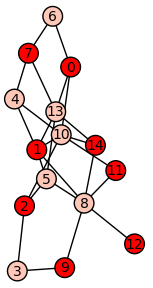

In [37]:
G.plot(vertex_colors=dict([('red', _)]))

Some solutions are below.

In [28]:
edges_in_path = []
p = G.shortest_path(2,14)
for i in range(len(p[:-1])):
    edges_in_path.append([p[i], p[i+1]])
edges_in_path

[[2, 10], [10, 14]]

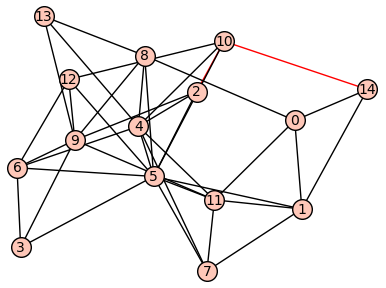

In [29]:
G.plot(edge_colors=dict([('red', edges_in_path)]))

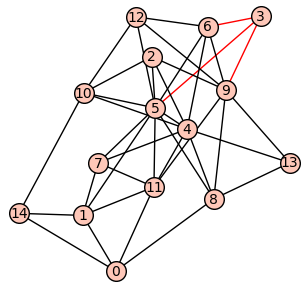

In [32]:
G.edge_connectivity(value_only=False)
G.plot(edge_colors=dict([('red', _[1])]))

Etc. [Solutions here will be added later]

# A quiz!

The *chromatic number* of a graph is the minimum number of colours needed to colour all vertices such that no two adjacent vertices (so vertices that share an edge) have the same colour.

> What is the chromatic number of the following graphs?

#### For 1 point:

In [33]:
G = graphs.CompleteGraph(6)

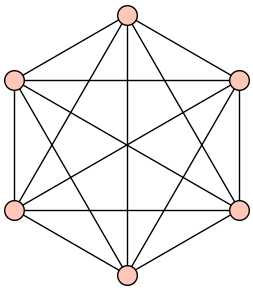

In [34]:
G.plot(vertex_labels=False)

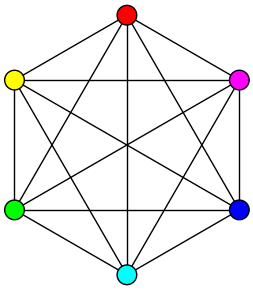

In [35]:
c = G.coloring(hex_colors=True); G.plot(vertex_colors=c, vertex_labels=False)

For complete graphs, so graphs for which all possible exist, the chromatic number is the number of vertices.

#### For 1 point:

In [36]:
G = graphs.CompleteBipartiteGraph(6,7)

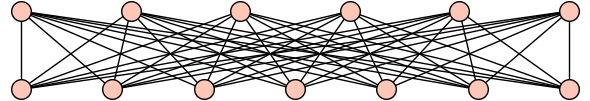

In [37]:
G.plot(vertex_labels=false)

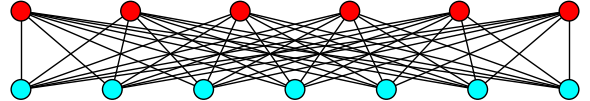

In [38]:
c = G.coloring(hex_colors=True); G.plot(vertex_colors=c, vertex_labels=False)

This is a bipartite graph (because there is no edge from the top set to the top set, or between two vertices of the bottom set). All vertices of the top can be coloured the same, just like all the vertices in the bottom.

#### For 1 point:

In [39]:
G = graphs.CycleGraph(7)

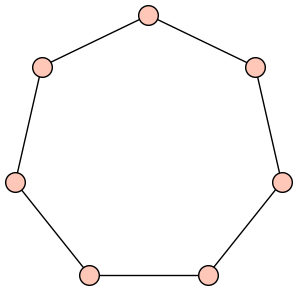

In [40]:
G.plot(vertex_labels=False)

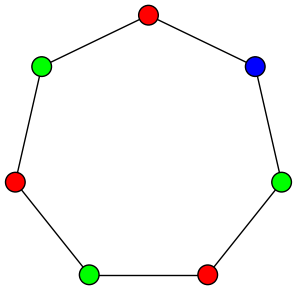

In [41]:
c = G.coloring(hex_colors=True); G.plot(vertex_colors=c, vertex_labels=False)

Cycles of odd length need to be colored with 3 different colors.

#### For 1 point:

In [42]:
G = graphs.CycleGraph(6)

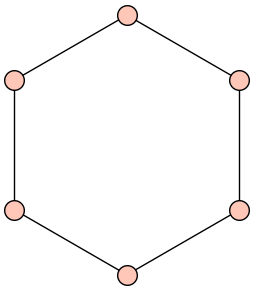

In [43]:
G.plot(vertex_labels=False)

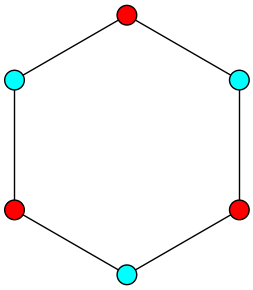

In [44]:
c = G.coloring(hex_colors=True); G.plot(vertex_colors=c, vertex_labels=False)

Cycles of even length are bipartite graphs, so they can be colored with two colors.

#### For 2 points:

In [45]:
G = graphs.GrotzschGraph()  # Equivalent to Mycielski's graph of order 4

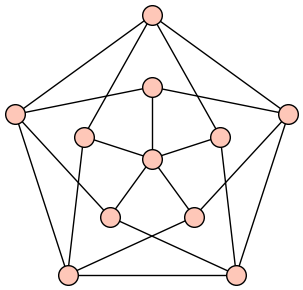

In [46]:
G.plot(vertex_labels=False)

#### For 1 point if you accept the hint:

Hint:  This is called the Mycielski graph of order 4.

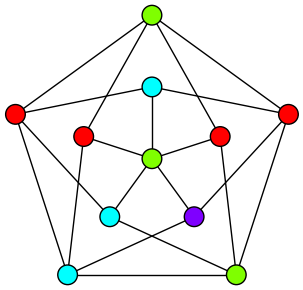

In [47]:
c = G.coloring(hex_colors=True); G.plot(vertex_colors=c, vertex_labels=False)

Mycielski's do not contain any triangle, but they have arbitrary large chromatic numbers.

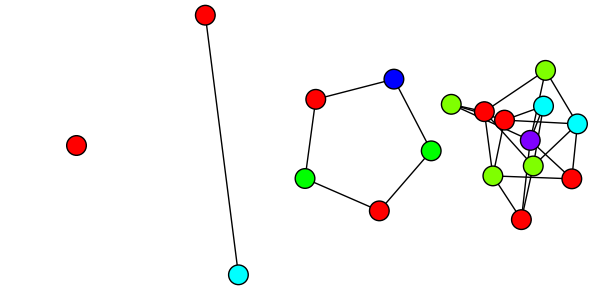

In [48]:
graphics_array([graphs.MycielskiGraph(i).plot(vertex_labels=False, vertex_colors=graphs.MycielskiGraph(i).coloring(hex_colors=True)) for i in range(1,5)])

#### For 2 points:

In [49]:
G = graphs.CubeGraph(4)

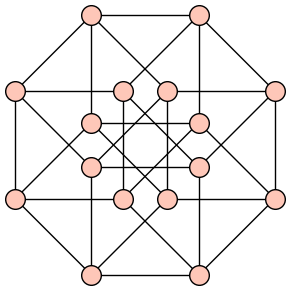

In [50]:
G.plot(vertex_labels=False)

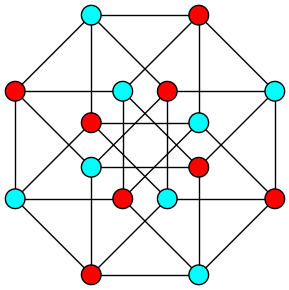

In [51]:
c = G.coloring(hex_colors=True); G.plot(vertex_colors=c, vertex_labels=False)

This is the hypercube of dimension 4, and hypercubes are bipartite.

### Planarity questions

Are the following graphs **planar**? A graph is *planar* if it can be drawn without edge crossings.

#### For 1 point:

In [52]:
G = graphs.CompleteGraph(4)

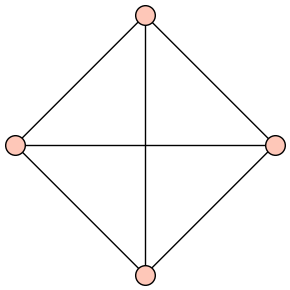

In [53]:
G.plot(vertex_labels=False)

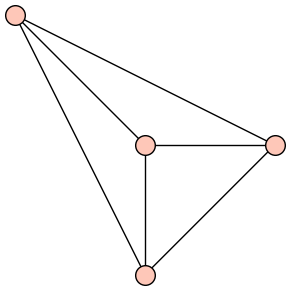

In [54]:
G.plot(vertex_labels=False, layout='planar')

The complete graph on four vertices is also the skeleton of the tetrahedron, and can be drawn in a planar way.

#### For 1 point:

In [55]:
G = graphs.CompleteGraph(5)

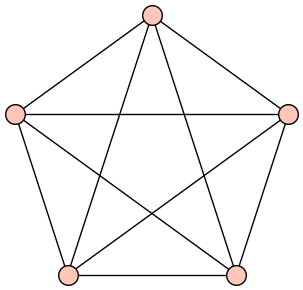

In [56]:
G.plot(vertex_labels=False)

The complete graph on five vertices is the smallest graph that is not planar.

#### For 1 point:

In [57]:
G = graphs.CubeGraph(3)

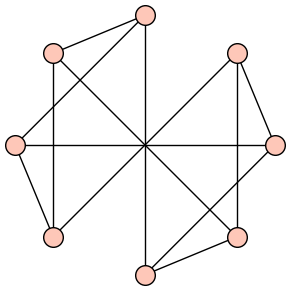

In [58]:
G.plot(vertex_labels=False, layout ='circular')

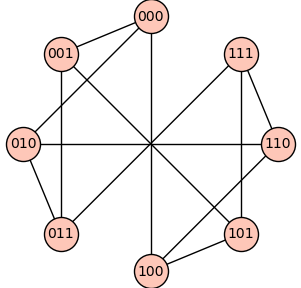

In [59]:
# Hint!
G.plot(layout ='circular', vertex_size=600)

This is the Cube Graph! The cube graph is planar.

#### For 1 point:

In [60]:
G = graphs.CubeGraph(4)

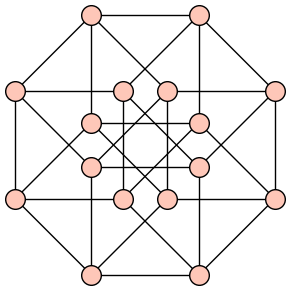

In [61]:
G.plot(vertex_labels=False)

The hypercube of dimension 4 is not planar...

### Counting the points... Do we have a winner?